Matches dataset:
(756, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3 

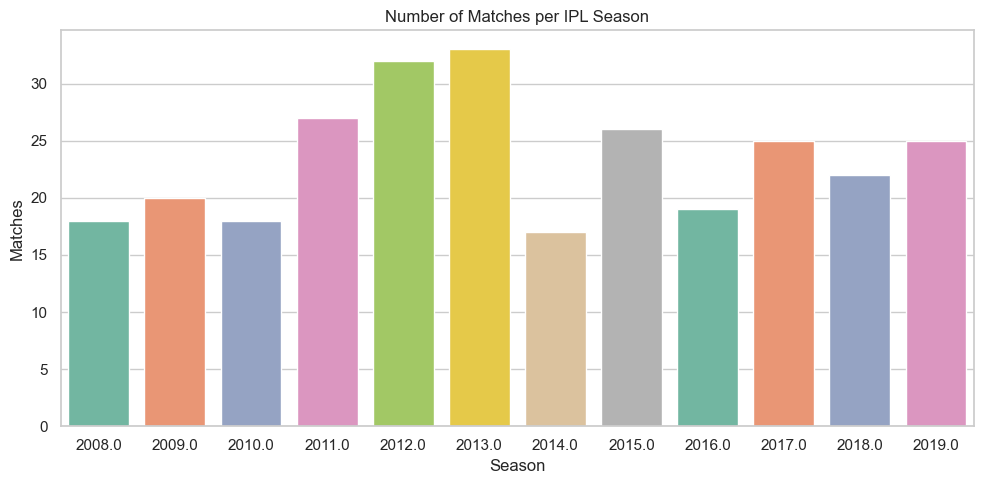

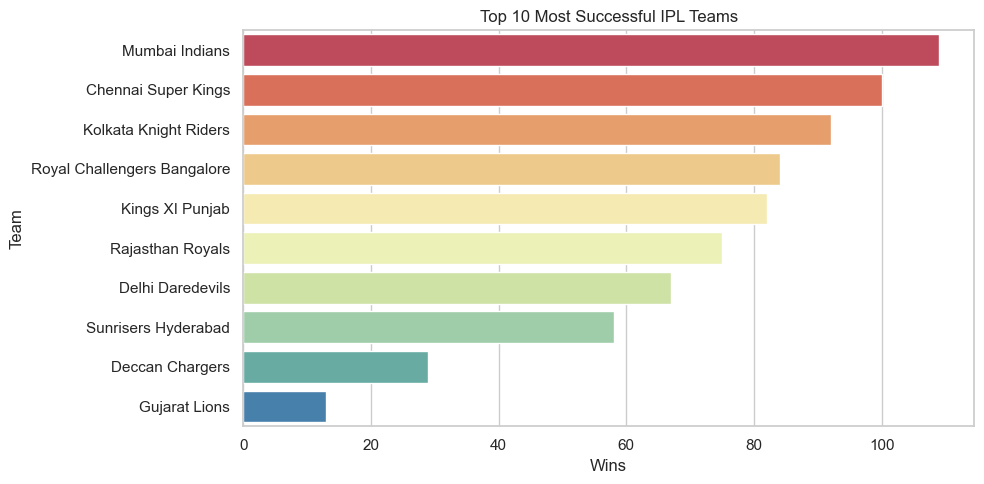

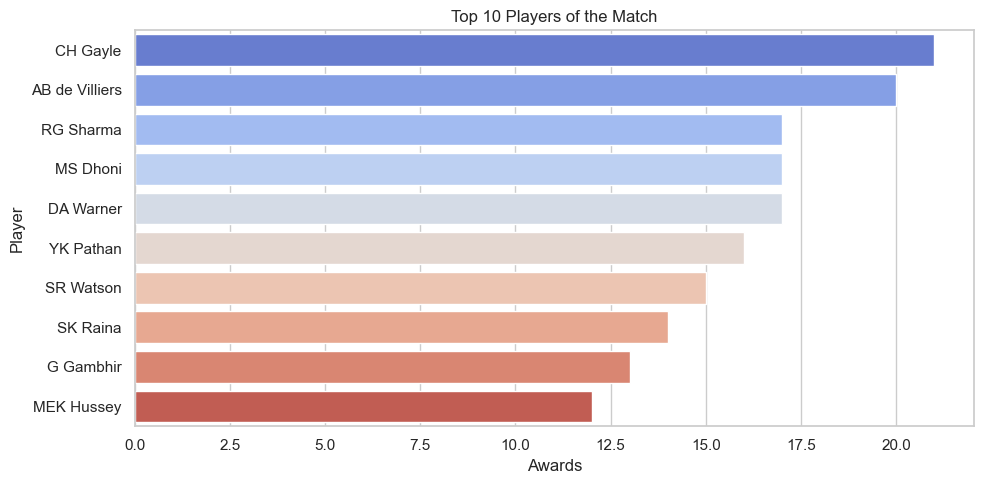

Toss winner also won the match in 393 out of 756 matches.
Percentage: 51.98%


In [3]:

#  IPL EDA Starter

##  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

##  Load Datasets
matches = pd.read_csv('../data/matches.csv')
deliveries = pd.read_csv('../data/deliveries.csv')

##  Basic Info
print("Matches dataset:")
print(matches.shape)
print(matches.info())
print("\nDeliveries dataset:")
print(deliveries.shape)
print(deliveries.info())

##  Matches by Season
# Extract season from date
matches['date'] = pd.to_datetime(matches['date'], errors='coerce')
matches['season'] = matches['date'].dt.year

season_counts = matches['season'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='Set2')
plt.title("Number of Matches per IPL Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.tight_layout()
plt.show()

##  Most Successful Teams
team_wins = matches['winner'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=team_wins.values, y=team_wins.index, palette='Spectral')
plt.title("Top 10 Most Successful IPL Teams")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

##  Player of the Match Awards
pom = matches['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=pom.values, y=pom.index, palette='coolwarm')
plt.title("Top 10 Players of the Match")
plt.xlabel("Awards")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

##  Toss vs Match Winner Analysis
toss_match_winner = matches[matches['toss_winner'] == matches['winner']].shape[0]
total_matches = matches.shape[0]
print(f"Toss winner also won the match in {toss_match_winner} out of {total_matches} matches.")
print(f"Percentage: {toss_match_winner / total_matches * 100:.2f}%")



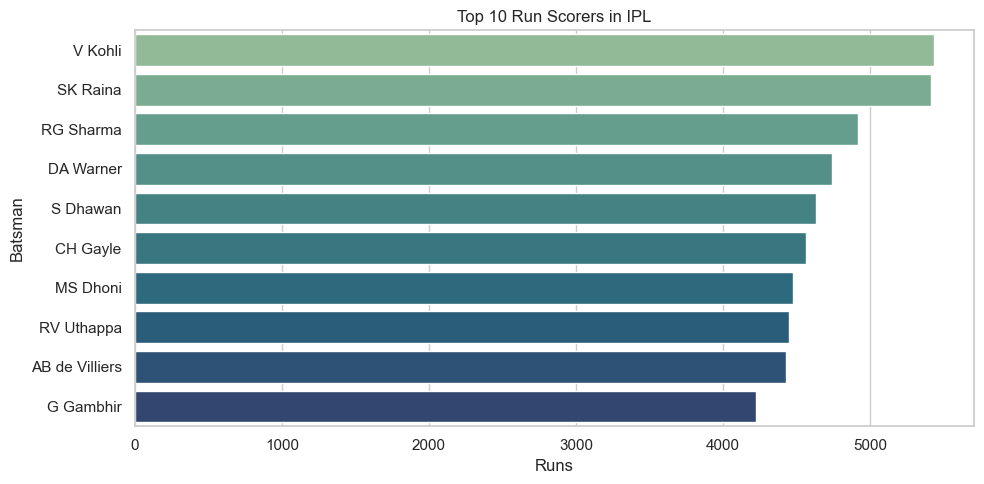

In [5]:
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='crest')
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


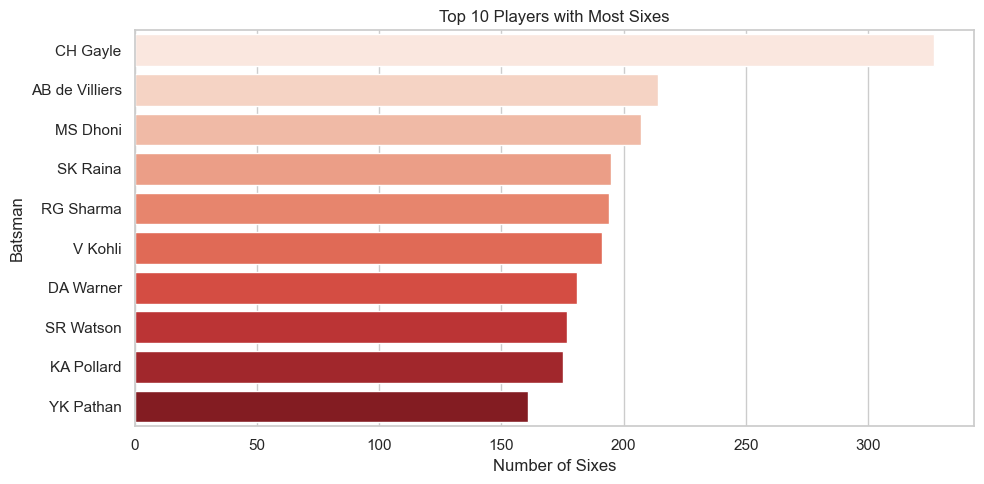

In [6]:
most_sixes = deliveries[deliveries['batsman_runs'] == 6]['batsman'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=most_sixes.values, y=most_sixes.index, palette='Reds')
plt.title("Top 10 Players with Most Sixes")
plt.xlabel("Number of Sixes")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


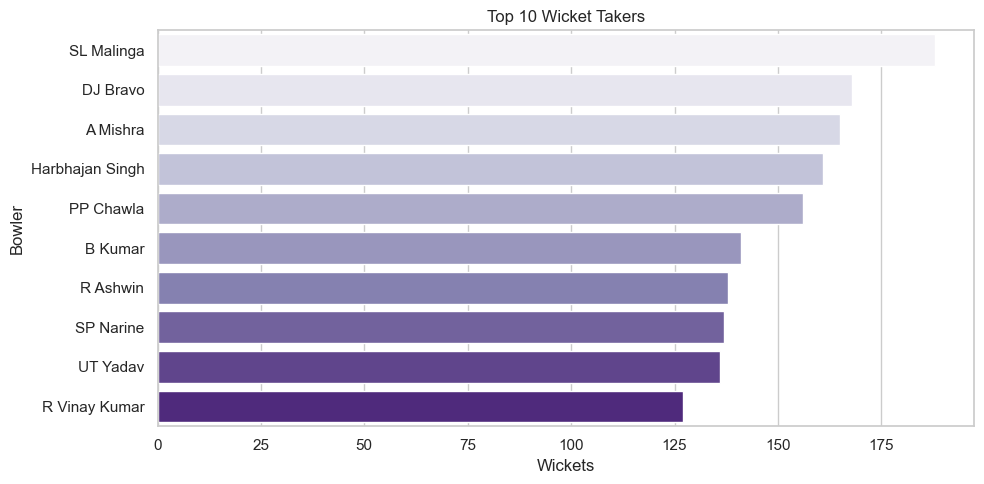

In [7]:
dismissals = deliveries[deliveries['dismissal_kind'].notna()]
top_bowlers = dismissals['bowler'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='Purples')
plt.title("Top 10 Wicket Takers")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()


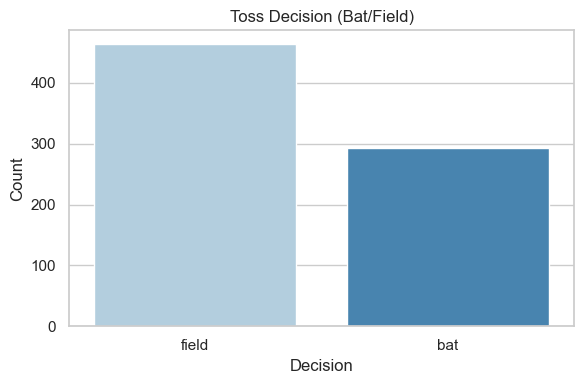

In [8]:
toss_decision = matches['toss_decision'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=toss_decision.index, y=toss_decision.values, palette='Blues')
plt.title("Toss Decision (Bat/Field)")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


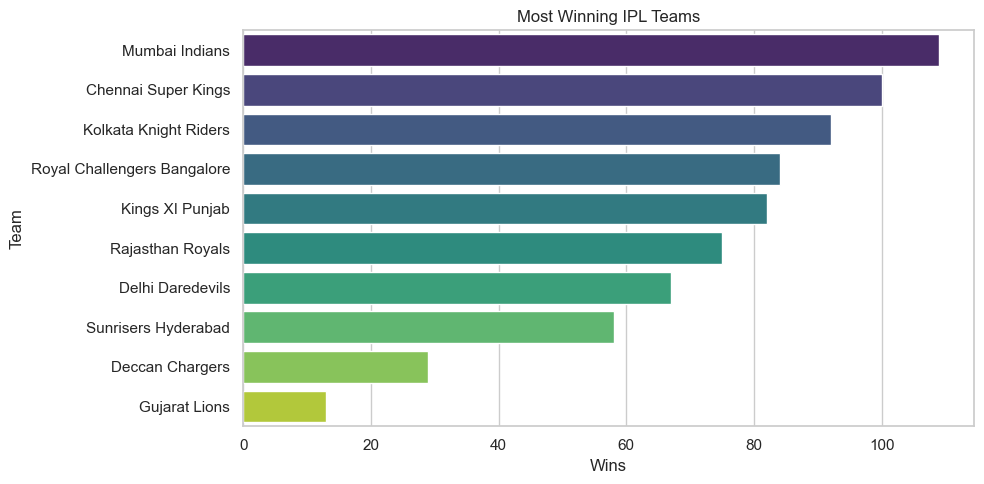

In [9]:
team_wins = matches['winner'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=team_wins.values, y=team_wins.index, palette='viridis')
plt.title("Most Winning IPL Teams")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


In [10]:
toss_and_match_winner = matches[matches['toss_winner'] == matches['winner']]
percentage = len(toss_and_match_winner) / len(matches) * 100

print(f"Toss winner also won the match in {len(toss_and_match_winner)} out of {len(matches)} matches.")
print(f"Winning Percentage after Toss: {percentage:.2f}%")


Toss winner also won the match in 393 out of 756 matches.
Winning Percentage after Toss: 51.98%


In [11]:
match_scores = deliveries.groupby('match_id')['total_runs'].sum().sort_values(ascending=False).head(10)
print("Top 10 Highest Match Totals:")
print(match_scores)


Top 10 Highest Match Totals:
match_id
7937     471
206      469
50       453
61       447
11338    445
11326    438
7904     435
259      433
562      431
68       431
Name: total_runs, dtype: int64
